## 1 Preliminaries                          

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/gawron/python-for-social-science/blob/master/pandas/pandas_assignment.ipynb)

In [1]:
# The usual preamble
import pandas as pd
from matplotlib import pyplot as plt
# Make the graphs a bit prettier, and bigger
#pd.set_option('display.mpl_style', 'default') 
#pd.set_option('display.line_width', 5000) 
pd.set_option('display.max_columns', 60) 

#figsize(15, 5)

We're going to use a new dataset here, to demonstrate how to deal with larger datasets. This is a subset of the of 311 service requests from [NYC Open Data](https://nycopendata.socrata.com/Social-Services/311-Service-Requests-from-2010-to-Present/erm2-nwe9). 

In [2]:
import pandas as pd
url = 'https://gawron.sdsu.edu/python_for_ss/course_core/book_draft/_static/names/yob2000.txt'
names2000 = pd.read_csv(url,names=['name','sex','births'])

In [3]:
names2000

,name,sex,births
0,Emily,F,25949
1,Hannah,F,23066
2,Madison,F,19965
3,Ashley,F,17991
4,Sarah,F,17677
...,...,...,...
29753,Zeph,M,5
29754,Zeven,M,5
29755,Ziggy,M,5
29756,Zo,M,5


## Basic Pandas skills (Baby names data)

###  2.1 Selecting columns and rows

In next cell, write an expression that returns a `pandas` `Series` with just the names in the `name` column.

In [4]:
names2000['name']

0          Emily
1         Hannah
2        Madison
3         Ashley
4          Sarah
          ...   
29753       Zeph
29754      Zeven
29755      Ziggy
29756         Zo
29757      Zyier
Name: name, Length: 29758, dtype: object

In the next cell, write an expression that returns the first 25 rows of the `names2000` dataframe,

In [5]:
names2000.head(25)

,name,sex,births
0,Emily,F,25949
1,Hannah,F,23066
2,Madison,F,19965
3,Ashley,F,17991
4,Sarah,F,17677
5,Alexis,F,17622
6,Samantha,F,17262
7,Jessica,F,15698
8,Elizabeth,F,15077
9,Taylor,F,15076


In the next cell write an expression that returns the first 25 row of the `name` column.

In [6]:
names2000[['name']].head(25)

,name
0,Emily
1,Hannah
2,Madison
3,Ashley
4,Sarah
5,Alexis
6,Samantha
7,Jessica
8,Elizabeth
9,Taylor


###  2.2 Selecting multiple columns

What if we just want to know the gender and the birth counts, but not the name? Pandas makes it really easy to select a subset of the columns: just index with list of columns you want.  Write an expression that that returns a data frame with just the `births` and `sex` columns of the `names2000` dataframe.

In [7]:
names2000[['births','sex']]

,births,sex
0,25949,F
1,23066,F
2,19965,F
3,17991,F
4,17677,F
...,...,...
29753,5,M
29754,5,M
29755,5,M
29756,5,M


Now write an expression that returns just the first ten rows of the dataframe you returned the cell above. 

In [8]:
names2000[['births','sex']].head(10)

,births,sex
0,25949,F
1,23066,F
2,19965,F
3,17991,F
4,17677,F
5,17622,F
6,17262,F
7,15698,F
8,15077,F
9,15076,F


### 2.3 Plotting

Write some lines of code that do a barplot of the first fifteen rows of the `names2000` dataframe.  Make sure the `x`-axis shows the name associated with each bar (and not just an arbitrary integer).

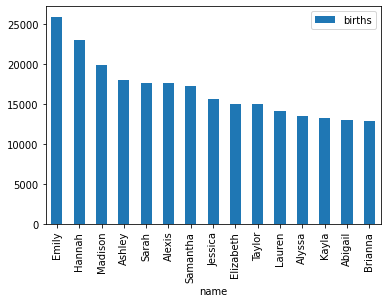

In [9]:
names2000 = pd.read_csv(url,names=['name','sex','births'],index_col='name')
ax = names2000[:15].plot(kind='bar')

## 3 Aggregation (Service requests data)

The following code loads the service requests data used in one of your pandas notebooks, and creates 
a subtable consisting of the data for just three agencies.  It then adds a **new** column called `Count`,
which we're going to use for counting complaints.  Since each row represents exactly one complain,
the value in the `Count` column is always 1.

You can learn more about this data set in the [pandas pivot and merge notebook.](https://github.com/gawron/python-for-social-science/blob/master/pandas/pandas_pivot_and_merge.ipynb)

In [10]:
import pandas as pd
fn = '311-service-requests.csv'
base_url = 'https://github.com/gawron/pandas-cookbook/master/data'
path = f'{base_url}/{fn}'
raw_path = path.replace('github.com','raw.githubusercontent.com')
complaints = pd.read_csv(raw_path,error_bad_lines=False)
complaints['Count'] = 1

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


Looking at the `Count` column:

In [11]:
complaints['Count'][:10]

0    1
1    1
2    1
3    1
4    1
5    1
6    1
7    1
8    1
9    1
Name: Count, dtype: int64

The following code creates a subtable with just the complaints for the following three
agencies: `DOT`, `DOP`, and `NYPD`.

In [12]:
pt00 = complaints[complaints.Agency.isin(['DOT', "DOP", 'NYPD'])]
pt=pt00.pivot_table(index='Agency', columns='Complaint Type', aggfunc=len, fill_value=0)
pt

Address Type                                   \
Complaint Type Agency Issues Animal Abuse Bike Rack Condition   
Agency                                                          
DOP                        0            0                   0   
DOT                       20            0                   7   
NYPD                       0          164                   0   

                                                                            \
Complaint Type Bike/Roller/Skate Chronic Blocked Driveway Bridge Condition   
Agency                                                                       
DOP                                    0                0                0   
DOT                                    0                0               20   
NYPD                                  32             4590                0   

                                                                        \
Complaint Type Broken Muni Meter Bus Stop Shelter Placement Compliment   
Agency                                                                   
DOP                            0                          0          0   
DOT                         2070                         14          1   
NYPD                           0                          0          0   

                                                                       \
Complaint Type Curb Condition DOT Literature Request Derelict Vehicle   
Agency                                                                  
DOP                         0                      0                0   
DOT                        66                    123                0   
NYPD                        0                      0              803   

                                                                        \
Complaint Type Disorderly Youth Drinking Ferry Complaint Ferry Inquiry   
Agency                                                                   
DOP                           0        0               0             0   
DOT                           0        0               4            32   
NYPD                         26       83               0             0   

                                                                               \
Complaint Type Ferry Permit Graffiti Highway Condition Highway Sign - Damaged   
Agency                                                                          
DOP                       0        0                 0                      0   
DOT                       1        0               130                      1   
NYPD                      0       13                 0                      0   

                                                                      \
Complaint Type Homeless Encampment Illegal Fireworks Illegal Parking   
Agency                                                                 
DOP                              0                 0               0   
DOT                              0                 0               0   
NYPD                           269                 3            3343   

                                                                         \
Complaint Type Invitation Municipal Parking Facility Noise - Commercial   
Agency                                                                    
DOP                     1                          0                  0   
DOT                     0                          1                  0   
NYPD                    0                          0               2578   

                                                                              \
Complaint Type Noise - House of Worship Noise - Park Noise - Street/Sidewalk   
Agency                                                                         
DOP                                   0            0                       0   
DOT                                   0            0                       0   
NYPD                                 67          191    

Your mission should you decide to accept it is to create pivot table whose rows are the three agencies,
and whose columns are the complaint types.  Each cell in the table thus contains the total number of complaints
of that complaint type for that agency.  For example, in the NYPD row, the Animal Abuse column should
have the number 164, meaning that 164 animal abuse complaints were made to NYPD.


## 4.  Baby names

### 4.1: 

Use the babynames data created in the [general pandas intro notebook.](https://github.com/gawron/python-for-social-science/blob/master/pandas/general_pandas_intro.ipynb)
     and matplotlib to plot male and female
    births for the years covered in the data. Put this in
    a `jupyter notebook` file.  In the same notebook, use the babynames data to get a list of male and female names.
    

In [45]:
## The following code was pasted from https://github.com/gawron/python-for-social-science/blob/master/pandas/general_pandas_intro.ipynb
## under Loading the Baby names data onto your Google Drive
import urllib.request
import tarfile
import os.path
##. Where the data is on github
base = 'baby_names'
fn = f'{base}.tar.gz'
# The usual URL you visit with your browser
url = f'https://github.com/gawron/python-for-social-science/blob/master/pandas/{fn}'
# The download URL for downloading raw data.
thetarfile = url.replace('github','raw.githubusercontent')
thetarfile = thetarfile.replace('blob/','')
# Prepare a home for extracted data files on your Gdrive
# Change this if you want to run this as a jupyter NB
# and store the data on your local disk drive.
working_dir = '/content/gdrive/My Drive/'
data_dir = os.path.join(working_dir,'data')
try:
  # create directory if necessary
  os.makedirs(data_dir)
except:
  pass
os.chdir(data_dir)
#  When we extract we will extract into data_dir
# This may take a few minutes!
with urllib.request.urlopen(thetarfile) as tarhandle:
  # creates a TarFile inst, note weird mode for unzipping on remote stream
  thetarstream = tarfile.open(fileobj=tarhandle, mode="r|gz")
  # Extract all files into current directory
  thetarstream.extractall()

import pandas as pd
years = list(range(1880,2011))
pieces = []
columns = ['name','sex','births']
    
for year in years:
    path = f'names/yob{year:d}.txt'
    frame = pd.read_csv(path,names=columns)
    frame['year'] = year
    pieces.append(frame)    
    
names = pd.concat(pieces, ignore_index=True)
##

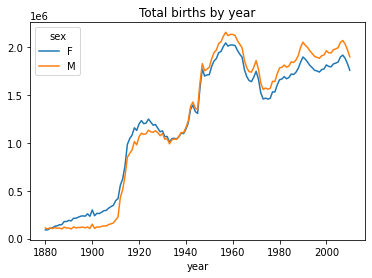

In [52]:
# Aggregate data by year and sex
total_births = names.pivot_table('births', 'year', columns='sex', aggfunc=sum)
# Plot data
ax = total_births.plot(title='Total births by year')

In [58]:
#Get a list of male and female names (I )
names_sex = names[['name', 'sex']]
names_sex

,name,sex
0,Mary,F
1,Anna,F
2,Emma,F
3,Elizabeth,F
4,Minnie,F
...,...,...
1690779,Zymaire,M
1690780,Zyonne,M
1690781,Zyquarius,M
1690782,Zyran,M


### 4.2

Aggregate the data for all years from the website
    (see the examples in the 
    Pandas notebook [general_pandas_intro.](https://github.com/gawron/python-for-social-science/blob/master/pandas/general_pandas_intro.ipynb)
    Find the **set** of all male names and the **set**
    of all female names. 
    For each letter find its frequency as a last letter in
    male names and in female names, using 
    Python Counters (`from collections import Counter`).
    Use matplotlib to draw a single plot that  shows
    contrast between the last-letter frequencies 
    for male and female names; x-axis is letters;
    y-axis is frequencies.

    

In [97]:
# First create male and female lists
female_names = names[names.sex == 'F']
male_names = names[names.sex == 'M']

# Create male and female letter frequency lists.
from collections import Counter
male_letter_freq = Counter()
#convert every letter to lowercase
for name in map(lambda x:x.lower(),male_names['name']):
    for i in name:
        male_letter_freq[i] += 1
female_letter_freq = Counter()
#convert every letter to lowercase
for name in map(lambda x:x.lower(),female_names['name']):
    for i in name:
        female_letter_freq[i] += 1

# Calculate the last letter frequency for male names
male_last_letter_freq = Counter()
for name in male_names['name']:
    male_last_letter_freq[name[-1]] += 1
print ("Last letter frequency for MALE names:")    
male_last_letter_freq

Last letter frequency for MALE names:


Counter({'a': 24595,
         'b': 3229,
         'c': 5040,
         'd': 36846,
         'e': 89654,
         'f': 3049,
         'g': 5079,
         'h': 17496,
         'i': 17257,
         'j': 1200,
         'k': 13654,
         'l': 59704,
         'm': 12432,
         'n': 162357,
         'o': 54088,
         'p': 1945,
         'q': 500,
         'r': 39164,
         's': 51901,
         't': 21290,
         'u': 2660,
         'v': 1380,
         'w': 2237,
         'x': 1924,
         'y': 53940,
         'z': 4178})

In [98]:
# Calculate the last letter frequency for female names
female_last_letter_freq = Counter()
for name in female_names['name']:
    female_last_letter_freq[name[-1]] += 1
print ("Last letter frequency for FEMALE names:")
female_last_letter_freq

Last letter frequency for FEMALE names:


Counter({'a': 423070,
         'b': 441,
         'c': 760,
         'd': 6472,
         'e': 226579,
         'f': 125,
         'g': 1736,
         'h': 38391,
         'i': 44045,
         'j': 157,
         'k': 1549,
         'l': 35858,
         'm': 3612,
         'n': 101212,
         'o': 8319,
         'p': 355,
         'q': 24,
         'r': 14073,
         's': 19423,
         't': 10540,
         'u': 2021,
         'v': 107,
         'w': 640,
         'x': 843,
         'y': 61789,
         'z': 1844})

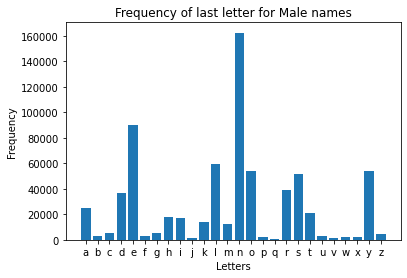

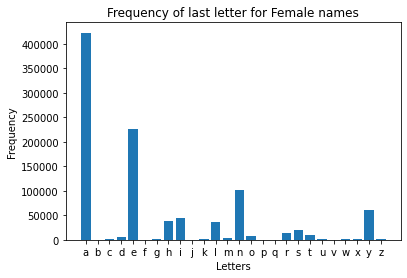

In [99]:
# Use matplotlib to draw single plot showing contrast between the last-letter frequencies for male and female names; x-axis is letters; y-axis is frequencies.
# Use OrderedDict to order counter items in ascending order
from collections import OrderedDict
#plot last letter frequency of male names in ascending order of letters
male_last_letter_freq_asc = OrderedDict(sorted(male_last_letter_freq.items()))
plt.bar(range(len(male_last_letter_freq_asc)), male_last_letter_freq_asc.values(), align='center')
plt.xticks(range(len(male_last_letter_freq_asc)), male_last_letter_freq_asc.keys())
plt.xlabel('Letters')
plt.ylabel('Frequency')
plt.title('Frequency of last letter for Male names')
plt.show()

#plot last letter frequency of female names in ascending order of letters
female_last_letter_freq_asc = OrderedDict(sorted(female_last_letter_freq.items()))
plt.bar(range(len(female_last_letter_freq_asc)), female_last_letter_freq_asc.values(), align='center')
plt.xticks(range(len(female_last_letter_freq_asc)), female_last_letter_freq_asc.keys())
plt.xlabel('Letters')
plt.ylabel('Frequency')
plt.title('Frequency of last letter for Female names')
plt.show()

### 4.3

Another plot.  The x-axis is names;
    the y-axis is frequencies.  Aggregate the data for female names into
    decades (10 year increments).  Produce a plot
    that contains an 1880s line, a 1940s line, and 
    a 1990s line.  There is a display issue here.  There
    are too many names to just write them out on the
    x-axis.  Try to devise an informative way of displaying
    the data that tells a story about fashions in names change.   Hint: Pick a value for n and consider the n most popular names in a decade.  But which decade?

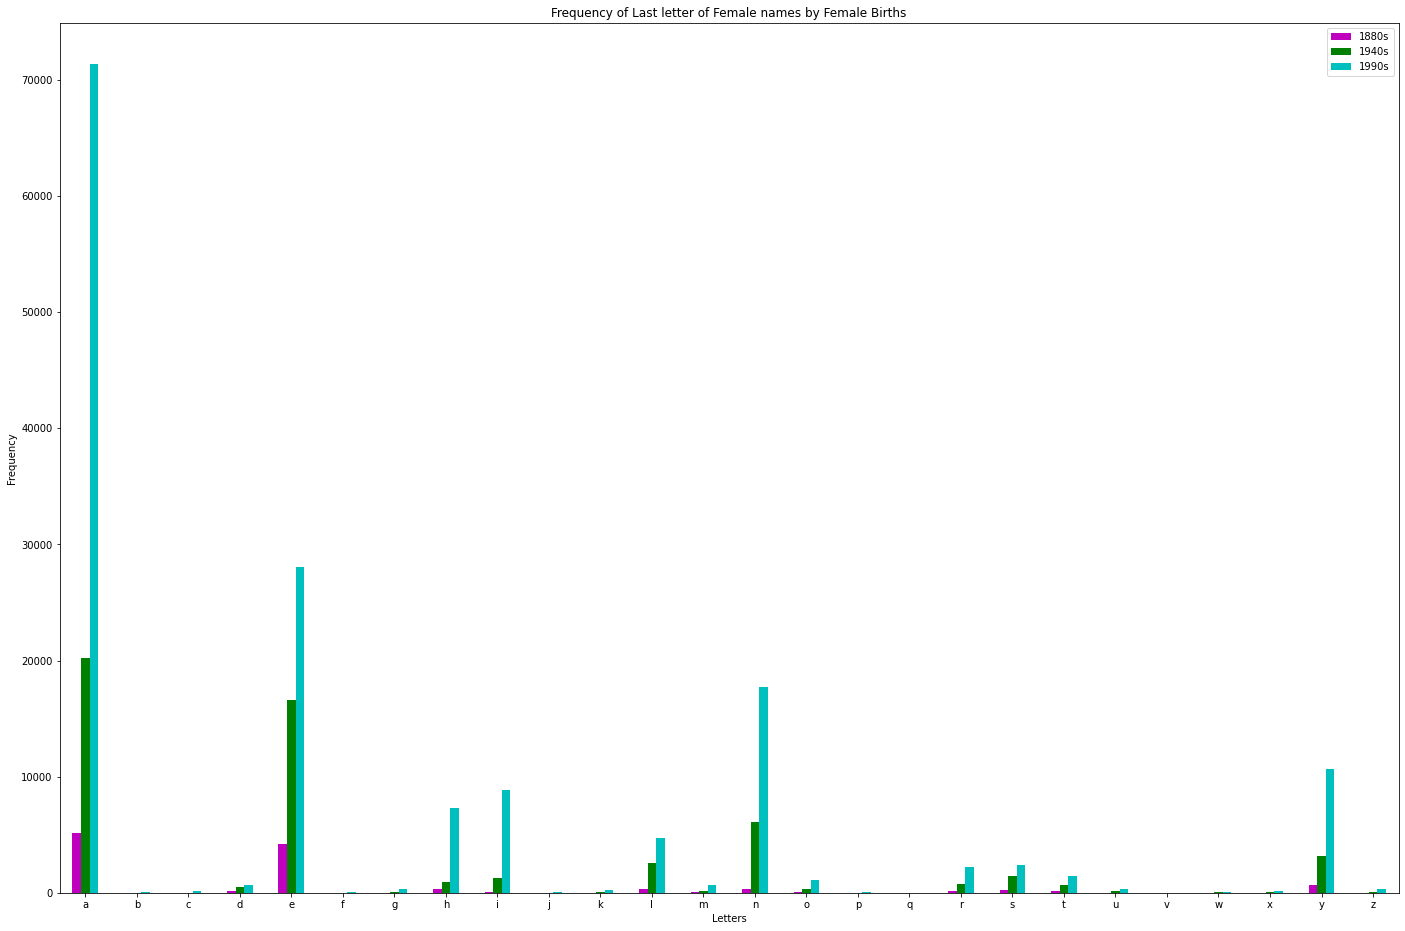

In [103]:
# Aggregate the data for female names into decades
female_1880 = female_names[female_names.year.isin(range(1880,1890))]
female_1890 = female_names[female_names.year.isin(range(1890,1900))]
female_1900 = female_names[female_names.year.isin(range(1900,1910))]
female_1910 = female_names[female_names.year.isin(range(1910,1920))]
female_1920 = female_names[female_names.year.isin(range(1920,1930))]
female_1930 = female_names[female_names.year.isin(range(1930,1940))]
female_1940 = female_names[female_names.year.isin(range(1940,1950))]
female_1950 = female_names[female_names.year.isin(range(1950,1960))]
female_1960 = female_names[female_names.year.isin(range(1960,1970))]
female_1970 = female_names[female_names.year.isin(range(1970,1980))]
female_1980 = female_names[female_names.year.isin(range(1980,1990))]
female_1990 = female_names[female_names.year.isin(range(1990,2000))]
female_2000 = female_names[female_names.year.isin(range(2000,2010))]
female_2010 = female_names[female_names['year'] >= 2010]

# Create data, frequencies for the 3 decades
# 1880's
female_1880_freq = Counter()
for name in female_1880['name']:
    female_1880_freq[name[-1]] += 1
female_1880_freq

# 1940's
female_1940_freq = Counter()
for name in female_1940['name']:
    female_1940_freq[name[-1]] += 1
female_1940_freq

# 1990's
female_1990_freq = Counter()
for name in female_1990['name']:
    female_1990_freq[name[-1]] += 1
female_1990_freq

# Convert frequency data from counter to dataframes after sorting the letters alphabetically.
# 1880s
first = pd.DataFrame.from_dict((OrderedDict(sorted(female_1880_freq.items()))), orient = 'index').reset_index()
first.columns = ['letter','frequency']
first['decade'] = '1880s'

# 1940s
second = pd.DataFrame.from_dict((OrderedDict(sorted(female_1940_freq.items()))), orient = 'index').reset_index()
second.columns = ['letter','frequency']
second['decade'] = '1940s'

# 1990s
third = pd.DataFrame.from_dict((OrderedDict(sorted(female_1990_freq.items()))), orient = 'index').reset_index()
third.columns = ['letter','frequency']
third['decade'] = '1990s'

# Aggregate 1880s, 1940s and 1990s frequencies
frames = [first, second, third]
columns = ["letter","frequency", "decade"]

req_decades = pd.DataFrame(pd.concat(frames))
req_decades.columns = columns

# Create pivot table
decades_table = pd.pivot_table(req_decades, index=['letter'], values=['frequency'], columns=['decade'])
decades_table.head()

# Plot
c = ['m','g','c']
decades_table['frequency'].plot(kind = 'bar', rot = 0,color = c, title = 'Frequency of Last letter of Female names by Female Births')
plt.xlabel('Letters')
plt.ylabel('Frequency')
plt.legend(loc = 'best')
# Quadruple the size of plot for visibility
size = 4
params = plt.gcf()
plSize = params.get_size_inches()
params.set_size_inches((plSize[0]*size, plSize[1]*size))
plt.show()

### 4.4 Extra Credit (You can wait until you learn about machine learning to do this)

Train a classifier that distinguishes male names
    from female names.  The features should be the last three
    letters in the names and the first three letters. If a name
    has fewer than six letters, it is okay for a letter to be represented
    both as a first letter and as a last letter.
    (This strategy guarantees that all names have the same length
    representation).  You will have to make a decision about what to do about
    ambiguous names (Lee, Sam, Pat), but don't simply exclude them.
    Note:  There are different interesting ways to deal with this issue, not
    just one answer. You should ask if you are unsure about your
    solution.
    
If a name has fewer than three letters ('Al'), pad it with spaces
    and use the spaces as part of your representation ('Al' => 'Al ') and the first
    three letters are ['A', 'l', ' '] and the last three letters are
    ['A', 'l', ' '].  Separate your names into training and test
    names.  Extra credit.  Does it help to make the decade a feature?
    
Turn  in your  notebook file, showing the code you used to
    complete parts 